## Displacement

In [20]:
import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model.regression import CNN, CNN_FineTune
from model.classification import ResNet18, ResNet18_finetune
from dataset.DamageIdentification import DamageIdentificationDataset
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

In [21]:
mode = "test"
source = ["synthetic"]
dataset = DamageIdentificationDataset(path="./Data", source=source, mode=mode, classification=True)
dataloader = DataLoader(dataset, batch_size=256, shuffle=False)

In [22]:
model1 = ResNet18(num_classes=216).to("cuda").eval()
state_dict = torch.load("./Logs/Identification/classification-Displacement_no9-ResNet18/LAST/version_0/checkpoints/epoch=00055-val_acc=0.5183.ckpt")["state_dict"]
model1.load_state_dict(state_dict)
model2 = ResNet18_finetune().to("cuda").eval()
state_dict = torch.load("./Logs/Identification/classification-synthetic-ResNet18_finetune/LAST/version_0/checkpoints/epoch=00166-val_acc=0.9921.ckpt")["state_dict"]
model2.load_state_dict(state_dict)

# model1 = ResNet18(num_classes=216).to("cuda").eval()
# state_dict = torch.load("./Logs/Identification/classification-Displacement_no9-ResNet18/LAST/version_0/checkpoints/epoch=00055-val_acc=0.5183.ckpt")["state_dict"]
# model1.load_state_dict(state_dict)
# model2 = ResNet18_finetune().to("cuda").eval()
# state_dict = torch.load("./Logs/Identification/classification-Displacement-synthetic-ResNet18_finetune/finetune/version_0/checkpoints/epoch=00092-val_acc=0.7759.ckpt")["state_dict"]
# model2.load_state_dict(state_dict)

ResNet(
  (conv1): Conv1d(5, 64, kernel_size=(13,), stride=(5,), padding=(4,), bias=False)
  (batch_norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (max_pool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
      (batch_norm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,), padding=(1,))
      (batch_norm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv1d(64, 256, kernel_size=(1,), stride=(1,))
      (batch_norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (i_downsample): Sequential(
        (0): Conv1d(64, 256, kernel_size=(1,), stride=(1,))
        (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=Tru

<All keys matched successfully>

In [23]:
resnet18_prediction = []
resnet18_finetune_prediction = []

target_list = []

loss = 0
softmax = torch.nn.Softmax(dim=1)

for input, target in dataloader:
    with torch.no_grad():
        input = input.to("cuda") 
        target = target.to("cuda")   
        target_list.append(target.cpu().numpy())   

        pred1 = torch.argmax(softmax(model1(input)), axis=1)
        pred2 = torch.argmax(softmax(model2(input)), axis=1)

        resnet18_prediction.append(pred1.cpu().numpy())
        resnet18_finetune_prediction.append(pred2.cpu().numpy())


resnet18_prediction = np.concatenate(resnet18_prediction)
resnet18_finetune_prediction = np.concatenate(resnet18_finetune_prediction)

target_list = np.concatenate(target_list)
acc1 = accuracy_score(resnet18_prediction, target_list.squeeze())
acc2 = accuracy_score(resnet18_finetune_prediction, target_list.squeeze())

In [24]:
print("Accuracy from network trained with real signals:", f"{acc1*100:.2f} %")
print("Accuracy from network trained with synthetic signals:", f"{acc2*100:.2f} %")

Accuracy from network trained with real signals: 0.10 %
Accuracy from network trained with synthetic signals: 99.49 %


In [25]:
target_list

array([[  0],
       [ 11],
       [ 12],
       ...,
       [213],
       [214],
       [215]])

In [26]:
np.unique(resnet18_prediction)

array([ 5, 10])

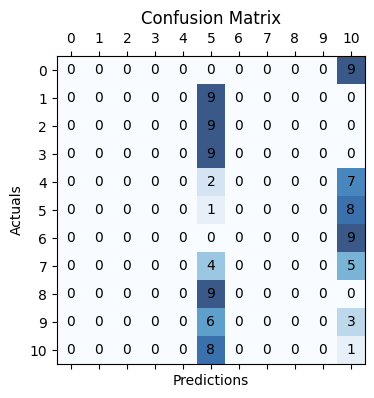

In [27]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_list.squeeze(), resnet18_prediction, labels=[i for i in range(11)])
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.8)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predictions')
plt.xticks([i for i in range(11)])
plt.yticks([i for i in range(11)])
plt.ylabel('Actuals')
plt.title(f'Confusion Matrix')
plt.savefig("./pic/confusion_matrix(real).svg", bbox_inches='tight')
plt.savefig("./pic/confusion_matrix(real).png", bbox_inches='tight', dpi=500)

In [28]:
np.unique(resnet18_finetune_prediction)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
conf_matrix

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

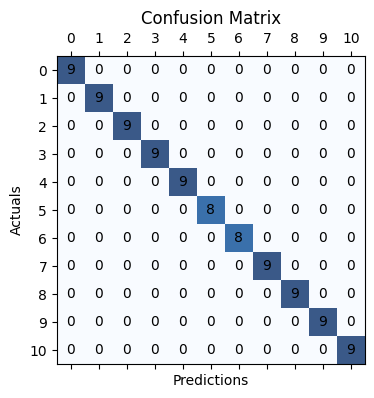

In [29]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_list.squeeze(),resnet18_finetune_prediction, labels=[i for i in range(11)])
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.8)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predictions')
plt.xticks([i for i in range(11)])
plt.yticks([i for i in range(11)])
plt.ylabel('Actuals')
plt.title(f'Confusion Matrix')
plt.savefig("./pic/confusion_matrix(real_synthetic).svg", bbox_inches='tight')
plt.savefig("./pic/confusion_matrix(real_synthetic).png", bbox_inches='tight', dpi=500)

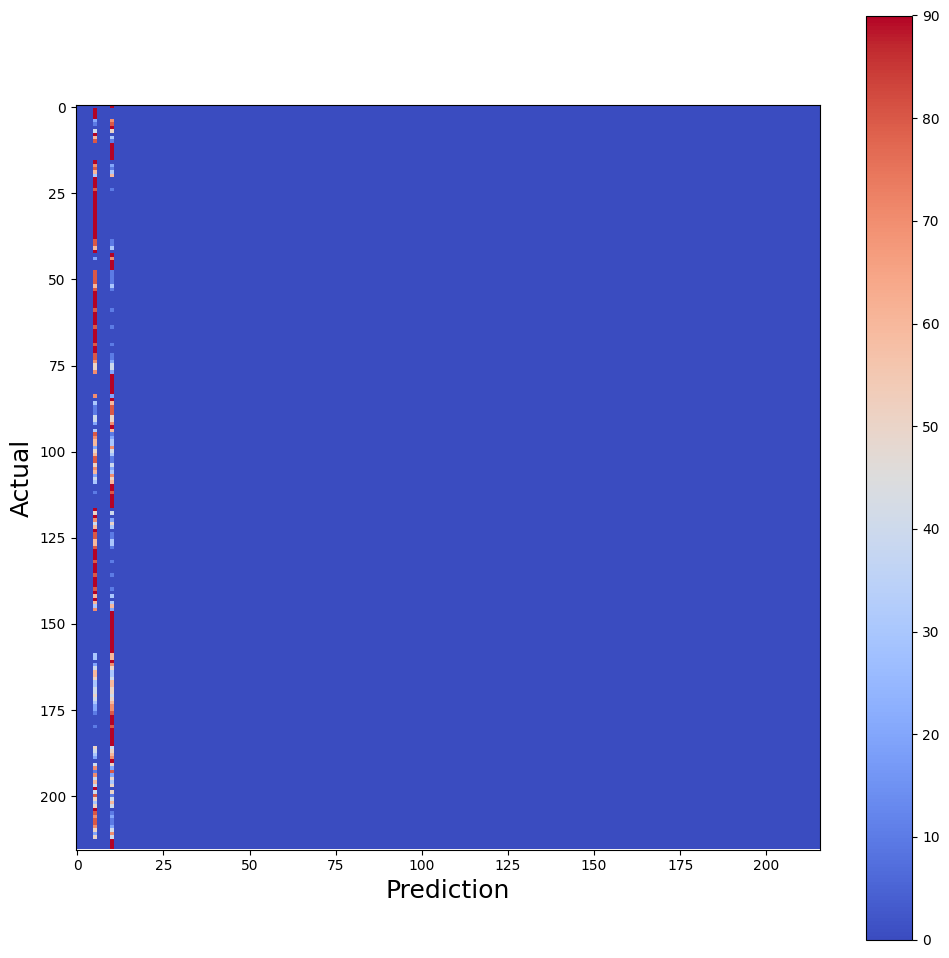

In [51]:
conf_matrix = confusion_matrix(target_list.squeeze(),resnet18_prediction, labels=[i for i in range(216)])
plt.figure(figsize=(12, 12))
plt.imshow(conf_matrix * 10, cmap='coolwarm')
plt.xlabel("Prediction", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.colorbar()
plt.savefig("./pic/heatmap(real).svg", bbox_inches='tight')

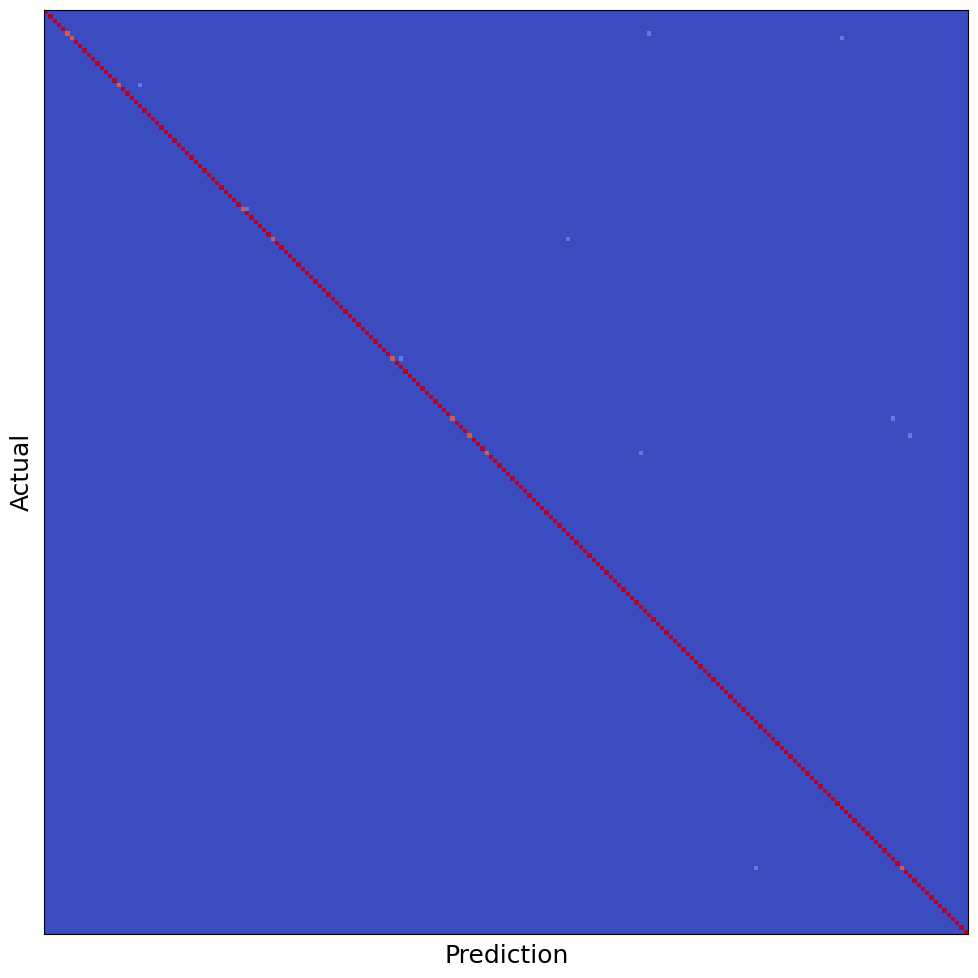

In [49]:
conf_matrix = confusion_matrix(target_list.squeeze(),resnet18_finetune_prediction, labels=[i for i in range(216)])
plt.figure(figsize=(12, 12))
plt.imshow(conf_matrix * 10, cmap='coolwarm')
plt.xlabel("Prediction", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.colorbar()
plt.show()

In [34]:
def check_unique_target(target_list):
    unique_target_list = []
    for i in target_list:
        add = True
        for j in unique_target_list:
            if (i == j).all():
                add = False
                break
        if add:
            unique_target_list.append(i)
    return unique_target_list

In [178]:
def get_index(target, target_list):
    index = []
    for i in target_list:
        if (target == i).all():
            index.append(True)
        else:
            index.append(False)

    return np.array(index)

In [179]:
def predition_csv(pred_list, target_list, model_name, mode):
    unique_target_list = check_unique_target(target_list)
    for target in unique_target_list:
        index = get_index(target, target_list)
        
        pred = pred_list[index]
        pred_no7, pred_no22, pred_no38 = pred[:, 0], pred[:, 1], pred[:, 2]
        target_no7, target_no22, target_no38 = target_list[index][:, 0], target_list[index][:, 1], target_list[index][:, 2]
        df = pd.DataFrame({
            "Predition (No.7)":pred_no7,
            "Target (No.7)":target_no7,
            "Predition (No.22)":pred_no22,
            "Target (No.22)":target_no22,
            "Predition (No.38)":pred_no38,
            "Target (No.38)":target_no38,
        })
        if not os.path.exists(f"./prediction/{model_name}/{mode}"):
            os.makedirs(f"./prediction/{model_name}/{mode}")
        df.to_csv(f"./prediction/{model_name}/{mode}/Prediction_{int(target_no7[0]*100):02d}_{int(target_no22[0]*100):02d}_{int(target_no38[0]*100):02d}.csv", index=False)

In [180]:
from scipy.stats import norm

def draw_predition_distribution(pred_list, target_list, model_name, mode, precision=0.01):
    unique_target_list = check_unique_target(target_list)
    for target in unique_target_list:
        index = get_index(target, target_list)
        
        pred = pred_list[index]
        max_value, min_value = pred.max(), pred.min()
        pred_no7, pred_no22, pred_no38 = pred[:, 0], pred[:, 1], pred[:, 2]
        target_no7, target_no22, target_no38 = target_list[index][:, 0], target_list[index][:, 1], target_list[index][:, 2]
        df = pd.DataFrame({
            "Predition (No.7)":pred_no7,
            "Target (No.7)":target_no7,
            "Predition (No.22)":pred_no22,
            "Target (No.22)":target_no22,
            "Predition (No.38)":pred_no38,
            "Target (No.38)":target_no38,
        })
        if not os.path.exists(f"./prediction/{model_name}/{mode}"):
            os.makedirs(f"./prediction/{model_name}/{mode}")
        df.to_csv(f"./prediction/{model_name}/{mode}/Prediction_{int(target_no7[0]*100):02d}_{int(target_no22[0]*100):02d}_{int(target_no38[0]*100):02d}.csv", index=False)

        # plt.rcParams['text.usetex'] = True
        # plt.rcParams['text.latex.preamble'] = r'\centering'
        # (mu_no7, sigma_no7) = norm.fit(pred_no7)
        # (mu_no22, sigma_no22) = norm.fit(pred_no22)
        # (mu_no38, sigma_no38) = norm.fit(pred_no38)

        # fig, ax = plt.subplots(figsize=(6, 6))
        # bin_size = np.arange(0, 0.51, precision)

        # ax.hist(pred_no7, align="left", bins=bin_size, density=False, range=(min_value, max_value), facecolor='tab:blue', alpha=0.5)
        # ax.hist(pred_no22, align="left", bins=bin_size, density=False, range=(min_value, max_value), facecolor='tab:orange', alpha=0.5)
        # ax.hist(pred_no38, align="left", bins=bin_size, density=False, range=(min_value, max_value), facecolor='tab:green', alpha=0.5)

        # ax.axvline(x = target_no7, linestyle = "-", color = 'tab:blue', label = 'Target of No.7')
        # ax.axvline(x = target_no22, linestyle = "--", color = 'tab:orange', label = 'Target of No.22')
        # ax.axvline(x = target_no38, linestyle = "-.", color = 'tab:green', label = 'Target of No.38')

        # xmin, xmax, ymin, ymax = plt.axis()
        # x = np.linspace(xmin, xmax, 100)
        # y = norm.pdf(x, mu_no7, sigma_no7)
        # l = ax.plot(x, y, linestyle = 'dotted', color = "tab:blue")
        # y = norm.pdf(x, mu_no22, sigma_no22)
        # l = ax.plot(x, y, linestyle = 'dotted', color = "tab:orange")
        # y = norm.pdf(x, mu_no38, sigma_no38)
        # l = ax.plot(x, y, linestyle = 'dotted', color = "tab:green")
        # ax.set_title(
        #     r'$\mu_{no.07}=%.3f$, $\sigma_{no.07}=%.3f;$'
        #     r'$\mu_{no.22}=%.3f$, $\sigma_{no.22}=%.3f;$\\' 
        #     r'$\mu_{no.38}=%.3f$, $\sigma_{no.38}=%.3f;$' % (mu_no7, sigma_no7, mu_no22, sigma_no22, mu_no38, sigma_no38))
        # ax.set_xlabel("Reduction of elastic modulus")
        # fig.suptitle(r"$Target_{no.07}=%.2f $ $Target_{no.22}=%.2f$ $Target_{no.38}=%.2f $" %(target_no7, target_no22, target_no38), fontsize=14)
        # fig.legend(ncol = 3, bbox_to_anchor=(0.92, 0.04))
        # if not os.path.exists(f"./pic/distribution/{model_name}/{mode}"):
        #     os.makedirs(f"./pic/distribution/{model_name}/{mode}")
        # plt.savefig(f"./pic/distribution/{model_name}/{mode}/Scenario{int(target_no7*100)}_{int(target_no22*100)}_{int(target_no38*100)}.svg", bbox_inches='tight')
        # plt.savefig(f"./pic/distribution/{model_name}/{mode}/Scenario{int(target_no7*100)}_{int(target_no22*100)}_{int(target_no38*100)}.png", bbox_inches='tight')
        # plt.close()

    # if (mu_no7 - 3 * sigma_no7) <= target_no7 <= (mu_no7 + 3 * sigma_no7) and (mu_no22 - 3 * sigma_no22) <= target_no22 <= (mu_no22 + 3 * sigma_no22) and (mu_no38 - 3 * sigma_no38) <= target_no38 <= mu_no38 + 3 * sigma_no38:
    #     return True
    # else:
    #     return False

In [181]:
predition_csv(scratch_prediction, target_list, model_name="Scratch", mode=mode)

In [182]:
from dataset.Displacement.SyntheticFinetune import SyntheticDataset

In [183]:
def get_all_condition():
    all_condition = []
    for d7 in range(6):
        for d22 in range(6):
            for d38 in range(6):
                onehot7 = np.eye(6)[d7]
                onehot22 = np.eye(6)[d22]
                onehot38 = np.eye(6)[d38]
                all_condition.append((onehot7, onehot22, onehot38))
    return all_condition

In [196]:
mode = "valid"
dataset = SyntheticDataset(n_times=50, gan_checkpoint="./Logs/Generation/Displacement_WCGAN_GP/LAST/version_0/checkpoints/epoch=00196-fjd=0.0000.ckpt", \
                           defined_condition=get_all_condition(), real_involve=True, mode=mode)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [197]:
fine_tune = CNN_FineTune.load_from_checkpoint("./Logs/Identification/Displacement(FineTune)-regression/Involve_real_data/version_0/checkpoints/epoch=00387-val_loss=0.0000.ckpt").eval().to("cuda")

In [198]:
fine_tune_prediction = []

target_list = []

loss = 0
criterion = nn.MSELoss()
for input, target in dataloader:
    with torch.no_grad():
        input = input.to("cuda")    
        target = target.to("cuda")
        pred =  fine_tune(input)
        fine_tune_prediction += pred.unsqueeze(0)
        loss += criterion(target, pred)
        print(pred)
        print(target)
        print("==================================================")

        target_list += target.unsqueeze(0)

print("Average MSE Loss: ", (loss/len(dataloader)).cpu().numpy())

fine_tune_prediction = torch.concat(fine_tune_prediction).cpu().numpy()
target_list = torch.concat(target_list).cpu().numpy()

tensor([[ 0.2523,  0.0097,  0.0572],
        [ 0.2173,  0.0006,  0.0530],
        [ 0.2211,  0.0033,  0.0507],
        [ 0.2183,  0.0025,  0.0528],
        [ 0.1914, -0.0051,  0.0600],
        [ 0.2278,  0.0216,  0.0495],
        [ 0.1624,  0.0054,  0.0223],
        [ 0.1336,  0.0078,  0.0187],
        [ 0.1559,  0.0067,  0.0039],
        [ 0.1322,  0.0089,  0.0112],
        [ 0.1260,  0.0087,  0.0044],
        [ 0.1636, -0.0017,  0.0225],
        [ 0.1779,  0.0045,  0.0239],
        [ 0.1755,  0.0029,  0.0047],
        [ 0.1426,  0.0048,  0.0055],
        [ 0.1622,  0.0076,  0.0063],
        [ 0.1738,  0.0007,  0.0086],
        [ 0.1866,  0.0020,  0.0238],
        [ 0.1559,  0.0065,  0.0198],
        [ 0.1296, -0.0018,  0.0042],
        [ 0.1203,  0.0020,  0.0051],
        [ 0.1138,  0.0031,  0.0069],
        [ 0.1346,  0.0005,  0.0081],
        [ 0.1671,  0.0060,  0.0096],
        [ 0.1366, -0.0038,  0.0145],
        [ 0.1416, -0.0019,  0.0148],
        [ 0.1360, -0.0030,  0.0118],
 

In [195]:
unique_target_list = []
for i in target_list:
    add = True
    for j in unique_target_list:
        if (i == j).all():
            add = False
            break
    if add:
        unique_target_list.append(i)
    

In [132]:
len(unique_target_list)

216

In [133]:
target_list.shape

(5210, 3)

In [163]:
predition_csv(fine_tune_prediction, target_list, model_name="Scratch(synthetic-augment)", mode=mode)